In [1]:
import pandas as pd
import seaborn as sns

In [2]:
datadir = '../data/'

def count_repeated_chars(string, k):
    count = 0
    for i in range(len(string)-(k-1)):
        if string[i:i+k] == string[i]*k:
            count += 1
    return count

def is_palindrome(string):
    return string == string[::-1]

def has_numeric_sequence_3(string):
    for i in range(len(string)-2):
        if int(string[i])+1 == int(string[i+1]) and int(string[i+1])+1 == int(string[i+2]):
            return True
    return False

def has_numeric_sequence_3_rev(string):
    return has_numeric_sequence_3(string[::-1])

def count_distinct_chars(string):
    return len(set(string))

def distinct_chars_under(s, n):
    return count_distinct_chars(s) <= n

def distinct_chars_over(s, n):
    return count_distinct_chars(s) >= n

def count_repeated_sequences(string, seq_length):
    count = 0
    for i in range(len(string) - seq_length + 1):
        if string[i:i+seq_length] in string[i+seq_length:]:
            count += 1
    return count

In [3]:
scoremap = {
    lambda s: count_repeated_chars(s, 2): 1,
    lambda s: count_repeated_chars(s, 3): 1,
    lambda s: count_repeated_chars(s, 4): 1,
    is_palindrome: 5,
    has_numeric_sequence_3 : 2,
    has_numeric_sequence_3_rev : 2,
    lambda s: distinct_chars_under(s, 1): 10,
    lambda s: distinct_chars_under(s, 2): 5,
    lambda s: distinct_chars_under(s, 3): 2,
#    lambda s: distinct_chars_over(s, 5): 2,
#    lambda s: distinct_chars_over(s, 6): 5,
#    lambda s: distinct_chars_over(s, 7): 6,
#    lambda s: distinct_chars_over(s, 8): 8,
    lambda s: count_repeated_sequences(s, 2): 2,
    lambda s: count_repeated_sequences(s, 3): 3,
}

In [4]:
def score(s):
    ret = 0
    for idx, (f, mult) in enumerate(scoremap.items()):
        result = f(s)
        ret += mult*int(result)
    return ret

In [5]:
# source : https://data.gov.il/dataset/private-and-commercial-vehicles/resource/053cea08-09bc-40ec-8f7a-156f0677aff3?inner_span=True

#df = pd.read_csv('data/rechev-small.csv', encoding='iso-8859-1', sep='|')

fname = datadir + 'rechev.csv'
fd = open(fname, encoding='iso8859-8', errors='replace')
df = pd.read_csv(fd, sep='|')

for c in ['mispar_rechev', 'degem_cd', 'tozeret_cd', 'shnat_yitzur']:
    df[c] = df[c].astype(str)

df['model'] = df.apply(lambda x: '_'.join([x[y] for y in ['tozeret_cd', 'degem_cd', 'shnat_yitzur', 'sug_degem']]), axis=1)

In [6]:
# source : https://data.gov.il/dataset/mehir_yevuan
fname = datadir + 'vehicle_cost.csv'
fd = open(fname, encoding='utf-8', errors='replace')
prices = pd.read_csv(fd, sep='|', low_memory=False)

# this join dies in Jupyter
#df = pd.merge(left=df, right=prices, on='degem_cd')

for c in ['degem_cd', 'tozeret_cd', 'shnat_yitzur']:
    prices[c] = prices[c].astype(str)
for c in ['mehir']:
    prices[c] = pd.to_numeric(prices[c], errors='coerce')

prices['model'] = prices.apply(lambda x: '_'.join([x[y] for y in ['tozeret_cd', 'degem_cd', 'shnat_yitzur', 'sug_degem']]), axis=1)
prices_ = prices.copy()
prices = prices[['model', 'mehir']]

In [7]:
df['score'] = df['mispar_rechev'].apply(score)

In [8]:
sorted = df.sort_values(by='score', ascending=False)

cols=['mispar_rechev', 'shnat_yitzur', 'tzeva_rechev', 'tozeret_nm', 'kinuy_mishari', 'score']
sorted[cols].head(10)

,mispar_rechev,shnat_yitzur,tzeva_rechev,tozeret_nm,kinuy_mishari,score
912795,5555555,2017,שחור,מרצדס בנץ גרמנ,GLC 43 AMG,51
7666,1111111,2013,שנהב לבן,יונדאי טורקיה,I20,51
1475324,6666666,2008,שחור,טויוטה יפן,PRIUS HYBRID,51
2853759,20000002,2021,שנהב לבן,יונדאי קוריאה,VENUE,33
1852960,8888881,2017,שחור מטלי,טויוטה אנגליה,AVENSIS,28
3254380,9666666,2010,שנהב לבן,ניסאן יפן,INFINITI,28
1625095,5555551,2005,אפור כהה,יגואר,XJ8 3.5,28
1605796,7666666,2009,שן פיל,טויוטה יפן,LAND CRUISER,28
100086,2222223,2001,כסף,סובארו יפן,IMPREZA NEW,28
24316,1111110,2001,בז,טויוטה יפן,CAMRY,28


In [9]:
sorted.groupby('tozeret_nm')['score'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).query('count > 20').head(20)

,mean,count
tozeret_nm,,
בנטלי בריטניה,3.648148,108
פרארי,3.560748,107
מרצדס-בנץ אוסט,3.371014,345
מרצדס בנץ ד.אפ,3.051576,349
"מזדה ארהב""",2.574468,47
פורשה גרמניה,2.526005,1865
לקסוס קנדה,2.318182,22
וואי סין,2.281407,398
פיג'ו אוסטריה,2.269962,263


In [10]:
for C in sorted.columns:
    if C not in ['mispar_rechev', 'tozeret_cd', 'degem_cd', 'ramat_gimur', 'degem_manoa', 'mivchan_acharon_dt', 'tokef_dt', 'misgeret', 'tzeva_cd', 'zmig_kidmi', 'zmig_ahori', 'horaat_rishum', 'moed_aliya_lakvish', 'model', 'score']:
        print(sorted.groupby(C)['score'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).query('count > 200').head(20))

               mean    count
sug_degem                   
P          1.109740  3618193
M          1.017485   182790
                    mean  count
tozeret_nm                     
מרצדס-בנץ אוסט  3.371014    345
מרצדס בנץ ד.אפ  3.051576    349
פורשה גרמניה    2.526005   1865
וואי סין        2.281407    398
פיג'ו אוסטריה   2.269962    263
גי.אי.סי סין    2.248276    290
מזארטי איטליה   2.186275    510
מרצדס בנץ ארהב  2.077170   5922
דימלרקריזלר-אר  2.031646    474
פורשה סלובקיה   2.000000    311
מרצדס בנץ הונג  1.919238   5250
יגואר           1.893360   1491
מרצדס בנץ גרמנ  1.791648  35800
לנדרובר אנגליה  1.785838    579
לנדרובר סלובקי  1.736156    307
אאודי סלובקיה   1.732400   2713
די.אס צרפת      1.694477    851
דימלרקריזלר-גר  1.687729   4922
קאדילאק ארהב"   1.679698   4630
לקסוס יפן       1.654752  16171
              mean  count
degem_nm                 
TCNS51    3.418838    499
205.053   3.297735    309
HC81D     3.293375    317
TBNJ50    3.121359    206
253.954   2.966387    35

In [11]:
C='model'
#sorted['model'] = sorted.apply(lambda x: '_'.join([x[y] for y in ['tozeret_cd', 'degem_cd', 'shnat_yitzur', 'sug_degem']]), axis=1)
bymodel=sorted[['model', 'score']].groupby(C).agg(['mean', 'count'])
bymodel.columns = ['score', 'count']
bymodel = bymodel.sort_values(by='score', ascending=False).query('count > 20').reset_index()
#['score', 'shnat_yitzur', 'tozeret_cd']
bymodel = pd.merge(bymodel, prices, on='model')

<AxesSubplot: xlabel='score', ylabel='mehir'>

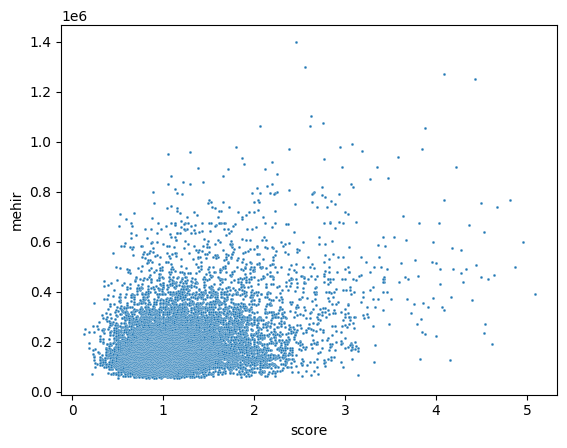

In [12]:
sns.scatterplot(data=bymodel, x='score', y='mehir', s=4)

In [13]:
from statsmodels.stats.proportion import proportions_ztest

def ztest_proportions(df, population, test):
    xtab=pd.crosstab(df[population], df[test])
    se, pval = proportions_ztest(xtab[True].to_list(), xtab.sum(axis=1).to_list())
    return pval

bymodel['c1'] = bymodel['score'] > bymodel['score'].quantile(0.9)
bymodel['c2'] = bymodel['mehir'] > bymodel['mehir'].quantile(0.9)
ztest_proportions(bymodel, 'c1', 'c2')

5.0777630942428255e-225

In [14]:
bymodel['score'].corr(bymodel['mehir'])

0.3738978907663669

In [15]:
for C in sorted.columns:
    if C not in ['mispar_rechev', 'tozeret_cd', 'degem_cd', 'ramat_gimur', 'degem_manoa', 'mivchan_acharon_dt', 'tokef_dt', 'misgeret', 'tzeva_cd', 'zmig_kidmi', 'zmig_ahori', 'horaat_rishum', 'moed_aliya_lakvish', 'model', 'score']:
        print(sorted.groupby(C)['score'].agg(['mean', 'count']).sort_values(by='mean', ascending=True).query('count > 200').head(5))

               mean    count
sug_degem                   
M          1.016486   184827
P          1.107193  3552391
                    mean  count
tozeret_nm                     
טויוטה בלגיה    0.456790    324
גיי.איי.סי סין  0.721519    237
ג'יפ איטליה     0.739771   1222
פיג'ו פורטוגל   0.776471    255
ליפמוטור סין    0.797710    262
                       mean  count
degem_nm                          
FA12AE0000A01D2A0  0.429224    219
SK9BY4L            0.531136    273
3AHNYT/2SM         0.580052    381
KW04B3             0.597938    291
L54J2              0.609804    510
                           mean   count
ramat_eivzur_betihuty                  
2.0                    1.091198  302671
4.0                    1.092539  308519
1.0                    1.098233  355919
6.0                    1.163621  146051
5.0                    1.168388  132521
                   mean   count
kvutzat_zihum                  
7.0            0.972405   69868
10.0           1.027448   76653
9.0    

In [16]:
s='למבורגיני'
s='טויוטה בלגיה'
s='בנטלי בריטניה'
s="פיג'ו אוסטריה"
s="גי.אי.סי סין"
df.query('tozeret_nm == @s')[['mispar_rechev','score', 'kinuy_mishari']]

,mispar_rechev,score,kinuy_mishari
1651054,19619202,2,GE3
1726798,19618302,0,GE3
1767383,23480202,4,GE3
1767386,23480302,2,GE3
1767389,23481202,2,GE3
...,...,...,...
3506200,23500902,1,GE3
3506202,23503202,0,GE3
3506217,23511302,1,GE3
3506223,23520002,3,GE3


In [17]:
s='GANR35'    # nissan GT-R, starting 880,000 NIS
# practical vehicles
#s='FA12AE0000A01D2A0'  # fiat 500 electric
#s='SK9BY4L'  # subaru forester
#s='3AHNYT/2SM' # citroen C4 SPACETOURER - minivan
#s='KW04B3'  # ranault kangoo
#s='L54J2'  # hyundai sonata
# fancy
s='USF40L-AEZGHW'   # lexus LS460
s='TCNS51'  # nissan infinity
s='HC81D'   # hyundai genesis GENESIS GV80
s='205.053' # mercedes C300E
s='TBNJ50' # nissan infinity
s='253.954' # mercedes GLC 350 E
s='222.182' # mercedes S 500
s='167.321' # mercedes GLE 350D
s='982'  # porsce 718
s='971'  # porsce Panamera
df.query('degem_nm == @s')#[['mispar_rechev','score']]

,mispar_rechev,tozeret_cd,sug_degem,tozeret_nm,degem_cd,degem_nm,ramat_gimur,ramat_eivzur_betihuty,kvutzat_zihum,shnat_yitzur,...,tzeva_cd,tzeva_rechev,zmig_kidmi,zmig_ahori,sug_delek_nm,horaat_rishum,moed_aliya_lakvish,kinuy_mishari,model,score
1434064,12032202,735,P,פורשה גרמניה,337,971,ORCHID PACK,4.0,2.0,2019,...,27,אפור מטל,275/35/21,315/30/21,חשמל/בנזין,180137.0,2019-9,PANAMERA 4 E-HY,735_337_2019_P,3
1434093,12033902,735,P,פורשה גרמניה,337,971,ORCHID PACK,4.0,2.0,2020,...,10,שחור,275/35/21,315/30/21,חשמל/בנזין,180137.0,2020-1,PANAMERA 4 E-HY,735_337_2020_P,1
1575134,12028302,735,P,פורשה גרמניה,337,971,ORCHID PACK,4.0,2.0,2020,...,27,אפור מטל,275/35/21,315/30/21,חשמל/בנזין,180137.0,2020-1,PANAMERA 4 E-HY,735_337_2020_P,2
1575213,12033102,735,P,פורשה גרמניה,337,971,ORCHID PACK,4.0,2.0,2019,...,27,אפור מטל,275/35/21,315/30/21,חשמל/בנזין,180137.0,2019-9,PANAMERA 4 E-HY,735_337_2019_P,1
1575386,12037102,735,P,פורשה גרמניה,333,971,ORCHID PACK,4.0,2.0,2019,...,80,שנהב לבן,275/35/21,315/30/21,חשמל/בנזין,180137.0,2019-11,PANAMERA 4 E-HY,735_333_2019_P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600062,35540302,735,P,פורשה גרמניה,475,971,E-HYBRID OP,4.0,2.0,2021,...,11,שחור מטלי,275/35/21,325/30/21,חשמל/בנזין,210217.0,2021-5,PANAMERA 4S E-H,735_475_2021_P,1
3627437,68780802,735,P,פורשה גרמניה,494,971,E-HYBRID OP,4.0,2.0,2022,...,80,שנהב לבן,275/35/21,315/30/21,חשמל/בנזין,210217.0,2022-4,PANAMERA 4 E-HY,735_494_2022_P,2
3684042,57272701,735,P,פורשה גרמניה,323,971,PREMIUM,1.0,2.0,2018,...,27,אפור מטל,275/35R21,315/30R21,חשמל/בנזין,180254.0,2018-10,PANAMERA4E-HYBR,735_323_2018_P,4
3684073,57288001,735,P,פורשה גרמניה,318,971,PREMIUM,1.0,2.0,2018,...,80,שנהב לבן,315/30R21,275/35R21,חשמל/בנזין,180254.0,2018-7,PANAMERA4E-HYBR,735_318_2018_P,2


In [18]:
df.query('mispar_rechev > "31415900" and mispar_rechev < "31415999"')

,mispar_rechev,tozeret_cd,sug_degem,tozeret_nm,degem_cd,degem_nm,ramat_gimur,ramat_eivzur_betihuty,kvutzat_zihum,shnat_yitzur,...,tzeva_cd,tzeva_rechev,zmig_kidmi,zmig_ahori,sug_delek_nm,horaat_rishum,moed_aliya_lakvish,kinuy_mishari,model,score
1919150,31415901,650,P,סובארו יפן,308,GP7FLUC,2.0I,NaN,15.0,2017,...,80,שנהב לבן,225/55R17,225/55R17,בנזין,160510.0,2017-10,XV,650_308_2017_P,0
1919154,31415902,443,P,מ.ג סין,22,A243,NET-UP,6.0,2.0,2022,...,11,שחור מטלי,235/50R18,235/50R18,חשמל/בנזין,210237.0,2022-6,EHS PHEV,443_22_2022_P,0
